### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [2]:
df = pd.read_csv("Categorical.csv")

In [3]:
df.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [24]:
df.loc[2:5, :]

,name,Longitude,Latitude,continent
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
5,Aland,19.953288,60.214887,Europe


### Variables for K-means

In [4]:
X = df.iloc[:, 1:3].to_numpy()

max_iter = 100
num_clusters = 4
num_samples = X.shape[0]
num_features = X.shape[1]

### Randomly assign centroids for K clusters

In [5]:
def init_centroids():
    centroids = np.zeros((num_clusters, num_features))
    
    for k in range(num_clusters):
        centroid = X[np.random.choice(range(num_samples))]
        centroids[k] = centroid
        
    return centroids

### Assign each sample to closest centroids to form clusters

In [6]:
def init_clusters(centroids):
    clusters = [[] for _ in range(num_clusters)]
    
    for idx, sample in enumerate(X):
        closest_centroid = np.argmin(np.sqrt(np.sum((sample - centroids) ** 2, axis=1)))
        clusters[closest_centroid].append(idx)
        
    return clusters

### Calculate new position for each centroids, by averaging corresponding clusters

In [7]:
def compute_new_centroids(clusters):
    centroids = np.zeros((num_clusters, num_features))
    
    for idx, cluster in enumerate(clusters):
        new_centroid = np.mean(X[cluster], axis=0)
        centroids[idx] = new_centroid
        
    return centroids

### Obtain class label for each sample or predict the label of cluster that a sample belongs to

In [8]:
def predict_cluster_labels(clusters):
    y_pred = np.zeros(num_samples)
    
    for clus_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            y_pred[sample_idx] = clus_idx
            
    return y_pred

### Put everything togather

In [9]:
centroids = init_centroids()

for _ in range(max_iter):
    clusters = init_clusters(centroids)
    
    previous_centroids = centroids
    centroids = compute_new_centroids(clusters)
    
    diff = centroids - previous_centroids
    
    if not diff.any():
        print("K-Means has converged!")
        break

K-Means has converged!


In [11]:
y_pred = predict_cluster_labels(clusters)

### Map each label/cluster to specific color as per assignment's requirment

In [18]:
LABEL_COLOR_MAP = {0 : "yellow", 1 : "green", 2 : "brown", 3 : "pink"}

label_color = [LABEL_COLOR_MAP[l] for l in y_pred]

### Visualize the data by using scatter plot

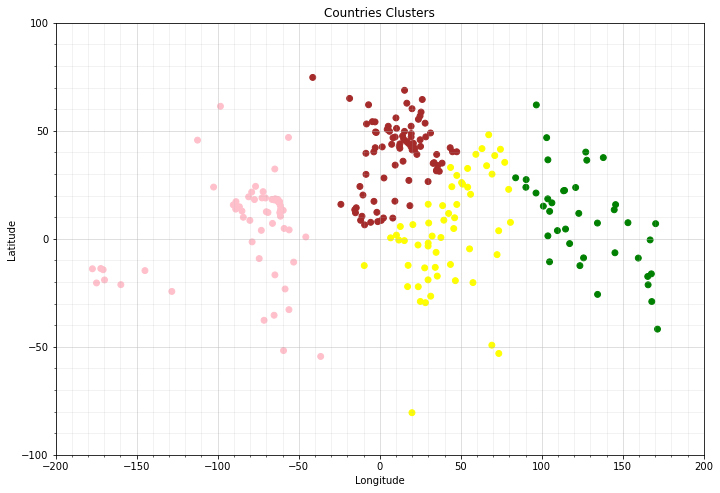

In [69]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_axes([0,0,1,1])

sc = ax.scatter(X[:, 0], X[:, 1], c=label_color, s=35)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Countries Clusters")

major_xticks = np.arange(-200, 201, 50)
minor_xticks = np.arange(-200, 201, 10)

major_yticks = np.arange(-100, 101, 50)
minor_yticks = np.arange(-100, 101, 10)

ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor = True)

ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor = True)

ax.grid(which = 'minor', alpha = 0.2)
ax.grid(which = 'major', alpha = 0.5)

### Save the generated plot

In [70]:
fig.savefig("Clustering.png", 
            dpi=100, 
            bbox_inches ="tight",
            pad_inches = 0.5,
            facecolor ="w")